In [1]:
print('assignment01 for GitJobish03 and edited in git, and 18')

assignment01 for GitJobish03 and edited in git, and 18


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [3]:
# Definimos nuestras 3 variables en el intervalo -1.3 a 3.5 como sigue:

x1 = np.arange(-1.3, 3.5, .125)     # factor/variable lineal
x2 = x1*x1                          # factor cuadrático
x3 = x1*x1*x1                       # factor cúbico

In [4]:
# Y definimos nuestra matriz de datos de entrada X como un DataFrame de Pandas:
# La matriz X estará formada por las columnas 1, 2 y 3 con los factores lineal,
# cuadrático y cúbico, respectivamente:

w = np.concatenate((np.vstack(x1),np.vstack(x2),np.vstack(x3)), axis=1)
w.shape

X = pd.DataFrame(w, columns=['x1','x2','x3'])
X.head()

,x1,x2,x3
0,-1.300,1.690000,-2.197000
1,-1.175,1.380625,-1.622234
2,-1.050,1.102500,-1.157625
3,-0.925,0.855625,-0.791453
4,-0.800,0.640000,-0.512000


In [5]:
# Definimos los siguientes pesos de manera arbitraria y que establece una relación
# polinomial cúbica en nuestra variable de salida Y:

w0 = 190
w1= -85/3
w2=-165
w3=160/3

print('Pesos (coeficientes) de una función polinomial de grado cúbico como función de salida:')
print('lineal: %.2f, cuadrático: %.2f cubo: %.2f' % (w1, w2, w3))

Pesos (coeficientes) de una función polinomial de grado cúbico como función de salida:
lineal: -28.33, cuadrático: -165.00 cubo: 53.33


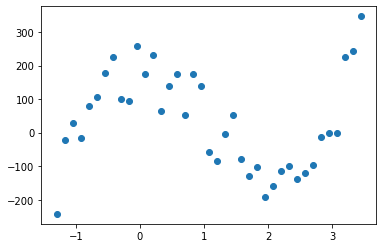

In [6]:
# Definimos nuestra variable de salida con algo de ruido para que nuestro problema
# no se reduzca simplemente a un problema de interpolación de puntos:

random.seed(1)
yreal = []
for x in x1:
  noise=200*(random.random() -0.5)
  cc = w3*np.power(x,3) + w2*np.power(x,2) + w1*x + w0 + noise
  yreal.append(cc)
  
  
plt.scatter(x1,yreal)
plt.show()

In [7]:
# Definamos 4 modelos: el de regresión lineal múltiple (RLM); de RLM con 
# regularización L1 (lasso); de RLM con regularización L2 (ridge) y
# RLM con regularización conjunta L1 y L2 (elastic-net):  

modelos = []
modelos.append(('LR', LinearRegression()))
modelos.append(('LASSO', Lasso(alpha=30)))  
modelos.append(('RIDGE', Ridge(alpha=30)))  
modelos.append(('EN', ElasticNet(alpha=1, l1_ratio=.5)))


yhat0 = []   # predicciones del modelo RLM
yhat1 = []   # predicciones del RLM con regularización L1
yhat2 = []   # predicciones del RLM con regularización L2
yhat12 = []  # predicciones del RLM con regularización L1 y L2


for name, model in modelos:
  # entrenamos el modelo seleccionado y obtenemos sus predicciones:
  print("%s:" % name)
  mm = model.fit(X, np.ravel(yreal))
  yhat = mm.predict(X)
  
  print(mm.intercept_)   # por si deseas conocer w0.
  print(mm.coef_)       # despleguemos los pesos obtenidos

  if name=='LR':
    yhat0.append(yhat)
    print('\n')
  elif name=='LASSO':
    yhat1.append(yhat)
    print('\n')
  elif name=='RIDGE':
    yhat2.append(yhat)
    print('\n')
  else:
    yhat12.append(yhat)

LR:
194.91638384474888
[ -40.14979812 -179.70350006   58.72754395]


LASSO:
117.13069427863499
[  -0.         -102.25253563   31.42721669]


RIDGE:
88.97294849574072
[-27.51573296 -61.84734688  22.38804271]


EN:
105.48167999947967
[-32.10655264 -79.34645456  28.06434904]


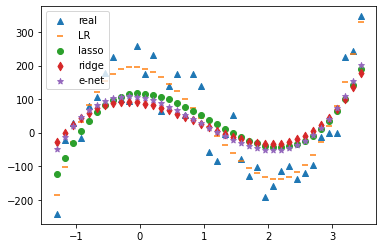

In [8]:
plt.scatter(x1, np.ravel(yreal), marker='^', label='real')  

plt.scatter(x1, np.ravel(yhat0), marker='_', label='LR')  
plt.scatter(x1, np.ravel(yhat1), marker='o', label='lasso')  
plt.scatter(x1, np.ravel(yhat2), marker='d', label='ridge')  
plt.scatter(x1, np.ravel(yhat12), marker='*', label='e-net')

plt.legend(loc=2)
plt.show()

ejercicio 2

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [10]:
mypath = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"

data = pd.read_csv(mypath, sep=" ", header=None)

data.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','class']

print(data.shape)
data.head()

(690, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [11]:
# Por ejemplo, veamos cómo se distribuyen los niveles en el caso del factor A4:

data['A4'].value_counts()

2    525
1    163
3      2
Name: A4, dtype: int64

In [12]:
data['A4'] = data['A4'].map({2:2, 1:0, 3:0})
data['A5'] = data['A5'].map({1:1,2:0,3:3,4:4,5:0,6:6,7:7,8:8,9:9,10:0,11:11,12:0,13:13,14:14})
data['A6'] = data['A6'].map({1:1,2:0,3:0,4:4,5:5,7:0,8:8,9:0})

In [13]:
# Ahora sí, definamos nuestras variables de entrada y de salida, observa que ambas son DataFrames de Pandas:

X = data.iloc[:,:-1]  

Y = data.iloc[:,-1]     # También puede ser: data[['class']] 

In [14]:
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)  

print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(552, 14) : dimensión de datos de entrada para entrenamiento y validación
(138, 14) : dimensión de datos de entrada para prueba
(552,) : dimensión de variable de salida para entrenamiento y validación
(138,) : dimensión de variable de salida para prueba


In [15]:
ytv.sum() / ytv.shape[0]

0.44565217391304346

In [16]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = ['A2','A3','A7','A10','A13','A14']

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']

catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])
catOHE_pipeline_nombres = [ 'A4','A5','A6','A12']


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

In [17]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  # MLP - Red Neuronal Artificial / Perceptrón Lineal Multicapa:  
  modelos.append(MLPClassifier(hidden_layer_sizes=(30,), max_iter=3000))
  nombres.append('MLP')
  
  # SVM - Máquina de Vector Soporte:
  modelos.append(SVC(gamma='scale'))
  nombres.append('SVM')

  # kNN - k-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier())
  nombres.append('kNN')
  
  return modelos, nombres

In [18]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv)


  resultados.append(scores)
  print('>> %s: %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))

>> LR: 0.861 (0.039)
>> DT: 0.816 (0.058)
>> MLP: 0.839 (0.039)
>> SVM: 0.850 (0.041)
>> kNN: 0.791 (0.040)


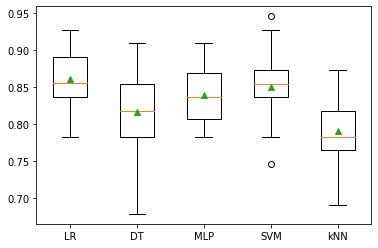

In [19]:
plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()

In [20]:
#from pandas.core.common import random_state

def get_modelsRegs():
  modelos, nombres = list(), list()

  # LR - sin regularización:
  modelos.append(LogisticRegression(penalty='none', solver='lbfgs', max_iter=2000, random_state=1))
  nombres.append('LR')

  # Lasso:
  modelos.append(LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000, C=1., random_state=1))
  nombres.append('LASSO')
  
  # Ridge:
  modelos.append(LogisticRegression(penalty='l2', solver='liblinear', max_iter=2000, C=10.01, random_state=1))
  nombres.append('RIDGE')
  
  # Elastic-Net:
  modelos.append(LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', max_iter=4000, C=1., random_state=1))
  nombres.append('EN')

  return modelos, nombres

>> LR 0.868 (0.050)
>> LASSO 0.867 (0.046)
>> RIDGE 0.869 (0.048)
>> EN 0.863 (0.048)


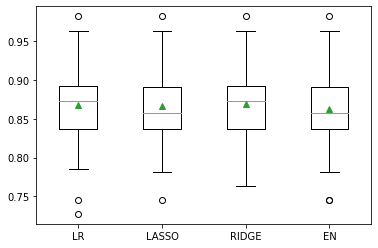

In [21]:
modelos, nombres = get_modelsRegs()
resultados = list() 

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)
  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv)

  resultados.append(scores)
  print('>> %s %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))


plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()

In [22]:
#from pandas.core.common import random_state

def get_modelsRegs():
  modelos, nombres = list(), list()

  # LR - sin regularización:
  modelos.append(LogisticRegression(penalty='none', solver='lbfgs', max_iter=5000, random_state=1))
  nombres.append('LR')

  # Lasso:
  modelos.append(LogisticRegression(penalty='l1', solver='liblinear', max_iter=5000, C=10.1, random_state=1))
  nombres.append('LASSO')
  
  # Ridge:
  modelos.append(LogisticRegression(penalty='l2', solver='liblinear', max_iter=5000, C=10.1, random_state=1))
  nombres.append('RIDGE')
  
  # Elastic-Net:
  modelos.append(LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', max_iter=5000, C=10.1, random_state=1))
  nombres.append('EN')

  return modelos, nombres

>> LR 0.868 (0.050)
>> LASSO 0.867 (0.049)
>> RIDGE 0.869 (0.048)
>> EN 0.868 (0.049)


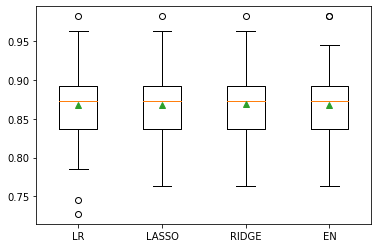

In [23]:
modelos, nombres = get_modelsRegs()
resultados = list() 

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)
  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv)

  resultados.append(scores)
  print('>> %s %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))


plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()

In [24]:
#from pandas.core.common import random_state

def get_modelsRegs():
  modelos, nombres = list(), list()

  # LR - sin regularización:
  modelos.append(LogisticRegression(penalty='none', solver='lbfgs', max_iter=2000, random_state=1))
  nombres.append('LR')

  # Lasso:
  modelos.append(LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000, C=.01, random_state=1))
  nombres.append('LASSO')
  
  # Ridge:
  modelos.append(LogisticRegression(penalty='l2', solver='liblinear', max_iter=2000, C=.01, random_state=1))
  nombres.append('RIDGE')
  
  # Elastic-Net:
  modelos.append(LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', max_iter=4000, C=.01, random_state=1))
  nombres.append('EN')

  return modelos, nombres

>> LR 0.868 (0.050)
>> LASSO 0.463 (0.042)
>> RIDGE 0.810 (0.050)
>> EN 0.754 (0.055)


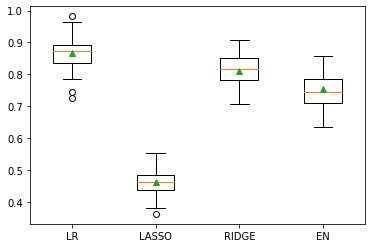

In [25]:
modelos, nombres = get_modelsRegs()
resultados = list() 

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)
  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv)

  resultados.append(scores)
  print('>> %s %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))


plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()

In [26]:
#from pandas.core.common import random_state

def get_modelsRegs():
  modelos, nombres = list(), list()

  # LR - sin regularización:
  modelos.append(LogisticRegression(penalty='none', solver='lbfgs', max_iter=2000, random_state=1))
  nombres.append('LR')

  # Lasso:
  modelos.append(LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000, C=.001, random_state=1))
  nombres.append('LASSO')
  
  # Ridge:
  modelos.append(LogisticRegression(penalty='l2', solver='liblinear', max_iter=2000, C=.001, random_state=1))
  nombres.append('RIDGE')
  
  # Elastic-Net:
  modelos.append(LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', max_iter=2000, C=.001, random_state=1))
  nombres.append('EN')

  return modelos, nombres

>> LR 0.868 (0.050)
>> LASSO 0.554 (0.008)
>> RIDGE 0.700 (0.068)
>> EN 0.554 (0.008)


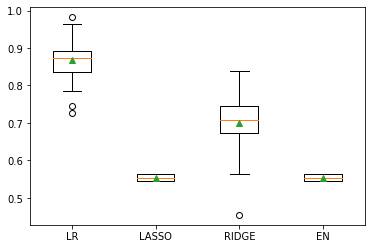

In [27]:
modelos, nombres = get_modelsRegs()
resultados = list() 

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)
  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv)

  resultados.append(scores)
  print('>> %s %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))


plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()

In [28]:
#from pandas.core.common import random_state

def get_modelsRegs():
  modelos, nombres = list(), list()

  # LR - sin regularización:
  modelos.append(LogisticRegression(penalty='none', solver='lbfgs', max_iter=5000, random_state=1))
  nombres.append('LR')

  # Lasso:
  modelos.append(LogisticRegression(penalty='l1', solver='liblinear', max_iter=5000, C=.001, random_state=1))
  nombres.append('LASSO')
  
  # Ridge:
  modelos.append(LogisticRegression(penalty='l2', solver='liblinear', max_iter=5000, C=.001, random_state=1))
  nombres.append('RIDGE')
  
  # Elastic-Net:
  modelos.append(LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', max_iter=5000, C=.001, random_state=1))
  nombres.append('EN')

  return modelos, nombres

>> LR 0.868 (0.050)
>> LASSO 0.554 (0.008)
>> RIDGE 0.700 (0.068)
>> EN 0.554 (0.008)


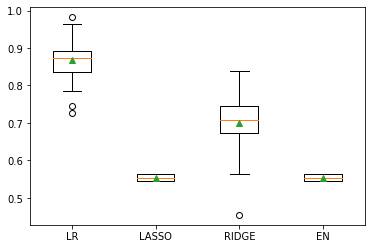

In [29]:
modelos, nombres = get_modelsRegs()
resultados = list() 

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)
  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv)

  resultados.append(scores)
  print('>> %s %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))


plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()



 
Instituto Tecnológico y de Estudios Superiores de Monterrey
 

ACTIVIDAD 3: REGRESIÓN LOGÍSTICA Y REGULARIZACIÓN
 


Liliana del Pilar Pineda González - A01793685



 
Ejercicio: 
1.	¿Qué puedes decir del modelo generado? 
Veo en el boxplot que son 4 historias muy parecidas. Noto que el primer modelo de regularizaciones tiene varios valores extremos. La mediana sí parece tener diferencias y Ridge está casi al mismo nivel que Lasso. Por la desviación estándar más pequeña, es decir el que mejor ajusta los datos, diría que es Lasso, sin embargo, el que tiene mejor puntaje de predicción es Ridge, porque es el que mejor predice la información, pero tiene una desviación estándar superior a la de Lasso. No es tan fácil concluir cuál es el mejor. 
Ahora, si nos vamos por precisión diríamos que el mejor modelo es Ridge, pero vemos que también Lasso tiene una desviación estándar inferior. Entonces puede que estén mejorando la predicción sin regularización, es decir, Lasso y Ridge están penalizando. Si es por precisión sería Ridge, pero Lasso tiene la ventaja de tener una desviación estándar menor y eso hace que al momento de predecir tengamos mejores resultados. 
Al irnos con Ridge, la diferencia no es tan marcada con Lasso, por lo que me quedaría con Ridge como la mejor opción.
Además, lo que el profesor nos explicó amablemente, es que debemos buscar una boxplot más compacta para que la desviación no sea tan amplia.
Al menos que haya outliers, deberíamos aplicar regularización.
Los modelos con regularización producen modelos más prudentes que luego facilitan obtener mejores predicciones para los datos reales nuevos, aún más cuando hay una importante cantidad de outliers. En este caso donde no se evidencian datos muy diferentes, puede pasar que los métodos penalizaron mucho estos modelos dado que los alejaron en gran medida de los valores reales.
2.	¿Ayudan en este caso el uso de las técnicas de regularización para obtener un mejor modelo? 

Corrí el modelo con varios cambios en alfa (C), 0.1, 0.001, 1, 10, y para las interacciones: 5 mil, 10 mil, sin embargo, en este caso es muy poca la variación, casi no cambia y no se evidencia una diferencia marcada. Cuando utilizamos la regularización, disminuimos la complejidad del modelo y también la función de coste. 

https://github.com/PosgradoMNA/actividades-de-aprendizaje-pinedalili 

Como resultado, obtenemos modelos más simples que pueden generalizar mejor. Aquellos modelos que son muy complejos tienden a sobreajustar o a identificar un resultado que aplica muy bien para los datos de entrenamiento, pero muy mal para datos nuevos. Por supuesto debemos preferir los modelos que además de aprender bien, generen un excelente rendimiento con datos nuevos.
La idea detrás de este tipo de regularización es reducir el valor de los parámetros para que sean pequeños.
3.	¿Podríamos considerar las diferencias mostradas entre ellos suficientes como para hablar de que uno de ellos es mejor que los otros?
No, porque en precisión Ridge es mejor que Lasso, pero Lasso tiene menor desviación estándar que Ridge, entonces cada uno tiene sus ventajas.
*Realiza ajustes a los argumentos de algunos de los modelos y observa si puedes obtener un mejor resultado, al menos en cuanto a su promedio general.

4.	¿Qué podrías concluir al respecto?

-	Puede que no sea tan necesaria la regularización, dado que el resultado de la regresión lineal es muy bueno y al aplicar los métodos de regularización no se ve una diferencia significativa.

-	Aunque depende del sector, en este caso es un modelo que arroja buenos resultados para el sector financiero, con una exactitud por encima de 88%. Con varios ajustes que realicé tanto a alfa como a las interacciones, se evidencia que Ridge definitivamente es la que mejor comportamiento tiene en la campana a pesar de tener unos outliers, con Ridge se eleva la exactitud de un 0.868 a 0.869.

-	Tenemos más falsos positivos que falsos negativos, es decir que es más alta la proporción de las personas que les dimos crédito respecto de los que debimos darle y no le dimos.  

-	Como lo indica la lectura, Lasso sirve cuando pensamos que algunos atributos son irrelevantes. Esta opción funciona mejor cuando los atributos no están muy correlacionados entre ellos y fomenta que la solución sea poco densa, privilegiando que algunos de los coeficientes acaben valiendo 0, lo cual es claves para identificar los atributos que son relevantes y para mejorar el modelo. Por lo anterior, puede que muchos de los datos que tengamos sean irrelevantes.

-	Dependerá de las políticas de las entidades financieras y del nivel de riesgo que asuman, en el marco legal establecido por los entes regulatorios y de acuerdo con Superintendencia Bancaria de Colombia [SBC], todo tipo de créditos presentan riesgos, en mayor o menor medida. Algunas de las causas por las cuales se da el impago de las obligaciones son: desempleo, inflación, corrupción, disminución de recursos.

5.	¿Se obtuvo un buen ajuste en alguno de los modelos?

Buscando que los datos se compacten más y queden ajustados y que los outliers se metan en el cuadro. En Lasso logra agrupar más datos, pero tenemos mucha dispersión, con una mediana más larga y está sesgada hacia un lado. En Ridge, la campana es más clara con altos y bajos a los lados, lo que quiere decir que su distribución es más balanceada; la moda y la mediana están más cerca. Con 1 y más aún con 0.5 se obtuvo el mejor ajuste. 

6.	¿Están subentrenados?

No se podría decir que está ni sobreentrenado ni subentrenado, porque si así fuera los resultados no tendrían buena exactitud y en este caso, sí los tienen. De hecho, con el data set el % de aciertos es 100%, pero si le metemos más información a la base de datos puede caer un 50% y ya no servirán para nuevos datos. 

7.	¿Están sobreentrenados?, no está sobreentrenado dado que se aplicó L1 y L2 para evitarlo. Si así fuera no me va a dar predicciones acertadas porque son predicciones muy optimistas y puede que esté memorizando los datos.

8.	¿Qué otra información necesitarías para responder estas preguntas?

Necesitamos más información. Las dimensiones que se toman en el modelo son categóricas y hay algunas numéricas, pero quisiera saber cuál es la información y qué dimensiones toma en particular para entender si hay alguna que resalta sobre las otras. Me refiero, desde la parte teórica y ya no desde los ajustes empíricos. Por lo anterior, requiero conocer en mayor detalle las dimensiones que se están tomando para construir los modelos, dado que pueden existir muchas variables como: tipo de trabajo, edad, plazo de pago, nuev@ o usad@, crédito amparado, día de pago, sueldo básico, tarjeta de crédito, sexo, ocupación, total egresos, profesión, valor a financiar, finca raíz, estado civil, cargo (empleado), estrato, años de vida laboral, hipoteca, entre otros.

9.	En particular observamos que las predicciones de falsos positivos, es mayor que la de falsos negativos. 
a.	¿Crees que esto sea lo mejor? Es decir, qué resultaría más costoso para el banco ¿autorizar una tarjeta de crédito a un mal cliente (falso positivo), o negársela a un buen cliente (falso negativo)? 

Si lo vemos desde el punto de vista del riesgo financiero y la pérdida de recursos para el banco, es mejor negarle la tarjeta a un buen cliente, aunque esto afectaría la reputación de la marca. Sin embargo, es mayor el daño reputacional y en recursos si se entregaran créditos a personas que van a incumplir con su pago.

b.	¿Qué información adicional necesitarías para contestar adecuadamente estas preguntas?

Dependerá de las políticas del banco y de la regulación a la que se acoge. Por ejeplo, para nuestra compañera de grupo quien trabaja en un banco reconocido, usualmente se usa desde un 66 hasta el 73, además comentó que dependerá del modelo que se utilice, en el sector bancario es muy utilizada la regresión logística, aunque ahora se utiliza un modelo de ensamble que combina varias regresiones para ajustar mejor los datos. Si se pasa de 80, es sobreentrenado y menor de 60, son sub-entrenado.

Bibliografía:

-	Diseño de un modelo predictivo para otorgar créditos. Recuperado de: https://revistas.udem.edu.co/index.php/economico/article/view/4113. Fecha de consulta: 1 de octubre de 2022. 
-	Modelo de predicción de operaciones de crédito. https://repositorio.udd.cl/bitstream/handle/11447/4042/Evitemos%20el%20castigo,%20Modelo%20de%20predicci%C3%B3n%20de%20operaciones%20de%20cr%C3%A9dito%20con%20posible%20default%20financiero.pdf?sequence=1. Fecha de consulta: 1 de octubre de 2022.
-	Estrategias basadas en el modelo de análisis predictivo árbol de decisión para la mejora del proceso de recaudo de cartera de la línea vehículo particular del banco Davivienda S.A. Recuperado de: https://repository.javeriana.edu.co/bitstream/handle/10554/16448/DazaSandovalLauraCarolina2015.pdf?sequence=3.  Fecha de consulta: 1 de octubre de 2022.
-	Propuesta de modelo de machine learning para la evaluación de riesgo de crédito utilizando algoritmos de predicción. Octubre 2019. Recuperado de: https://www.researchgate.net/publication/337480778_Propuesta_de_modelo_de_machine_learning_para_la_evaluacion_de_riesgo_de_credito_utilizando_algoritmos_de_prediccion_para_la_Cooperativa_de_Ahorro_y_Credito. Fecha de consulta: 1 de octubre de 2022.
-	Análisis de los factores determinantes de la asignación de riesgo financiero y crediticio de la pequeña banca privada del Ecuador. 11 de marzo de 2020. Recuperado de: http://portal.amelica.org/ameli/jatsRepo/392/3921938006/html/index.html. Fecha de consulta: 1 de octubre de 2022.
 
